You expect to have an encrypted message(report) from distant planet (See var_n values in the test file). 

It contains few issues to report on and you should find out :

1) how many issues it contains (themes)

2) label each message to a theme to have brief understanding of what's happening

After some time you receive the correct labels(See 'label' field in the csv file). 

It will be an good practice to compare the results and to make a predictor which will be useful for further labeling

You need to explain how did you found the right amount of clusters, and send out the output of the check functions

Hint:
You may find python libraries like pandas, numpy and sklearn to be quiet useful to solve this task

### Кластеризация

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Загрузим и посмотрим на данные
data = pd.read_csv('test_data.csv')

In [3]:
data.head()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,0,-0.480060,0.176260,0.198378,0.436684,0.172947,0.027392,-0.707964,0.320470,...,-0.302409,-0.297128,-0.096548,0.139542,-0.145355,0.395182,0.082721,0.005400,-0.026441,-0.108023
1,1,0,-0.314651,-0.134033,-0.222847,-0.013558,0.016558,0.365967,-0.552682,-0.000281,...,-0.042050,0.095499,-0.255792,-0.017712,-0.190932,0.082872,0.441845,0.110383,0.031139,0.039577
2,2,0,-0.300815,-0.084558,0.181238,0.005055,0.313164,0.112452,-0.635594,0.402153,...,0.449078,0.534868,-0.110871,-0.540410,-0.421506,0.294148,0.123150,-0.076787,0.126006,0.108019
3,3,0,-0.278396,0.168551,0.179791,0.039391,0.492830,0.185413,-0.388475,0.083588,...,0.159299,0.171783,-0.139541,-0.078331,-0.371579,0.283624,0.286695,0.068057,0.146644,0.114814
4,4,0,-0.252944,0.385547,-0.134255,0.069152,0.197859,0.296981,-0.387140,0.447478,...,-0.090061,-0.092603,-0.152751,-0.058263,-0.283934,0.223888,0.114866,0.059671,-0.033000,-0.073733


In [4]:
#Удалим 1ый столбец с номерами строк
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,-0.480060,0.176260,0.198378,0.436684,0.172947,0.027392,-0.707964,0.320470,-0.233182,...,-0.302409,-0.297128,-0.096548,0.139542,-0.145355,0.395182,0.082721,0.005400,-0.026441,-0.108023
1,0,-0.314651,-0.134033,-0.222847,-0.013558,0.016558,0.365967,-0.552682,-0.000281,-0.167029,...,-0.042050,0.095499,-0.255792,-0.017712,-0.190932,0.082872,0.441845,0.110383,0.031139,0.039577
2,0,-0.300815,-0.084558,0.181238,0.005055,0.313164,0.112452,-0.635594,0.402153,-0.439029,...,0.449078,0.534868,-0.110871,-0.540410,-0.421506,0.294148,0.123150,-0.076787,0.126006,0.108019
3,0,-0.278396,0.168551,0.179791,0.039391,0.492830,0.185413,-0.388475,0.083588,-0.186267,...,0.159299,0.171783,-0.139541,-0.078331,-0.371579,0.283624,0.286695,0.068057,0.146644,0.114814
4,0,-0.252944,0.385547,-0.134255,0.069152,0.197859,0.296981,-0.387140,0.447478,-0.432704,...,-0.090061,-0.092603,-0.152751,-0.058263,-0.283934,0.223888,0.114866,0.059671,-0.033000,-0.073733


In [6]:
data.shape

(16, 51)

Видим, что примеров мало. По масштабу фичи однородны.

In [7]:
#Выделим правильные метки
target = data.loc[:, 'target'].to_numpy()

In [8]:
#Выделим фичи
X = data.loc[:, 'var_0':].to_numpy()

Попробуем определить количество кластеров, не используя разметку.

In [9]:
from sklearn import decomposition

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Уменьшим размерность пространства до 2 с помощью PCA и визуализируем
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
print(pca.explained_variance_ratio_)

[ 0.34465841  0.20628865]


Доля объясненной дисперсии так себе, тем не менее посмотрим на данные.

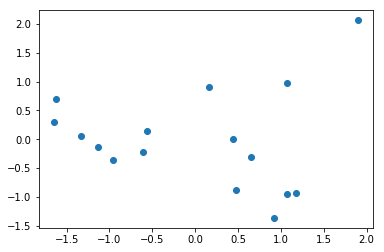

In [12]:
plt.plot(X_pca[:, 0], X_pca[:, 1], 'o')

Здесь визуально можно выделить 3-4 кластера. Я пробовала использовать t-SNE для визуализации, но там совсем не прослеживалось никакой стркутуры.

Проведем иерархическую кластеризацию (используя все фичи) и построим дендрограмму.

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [14]:
Z = linkage(X, 'ward')

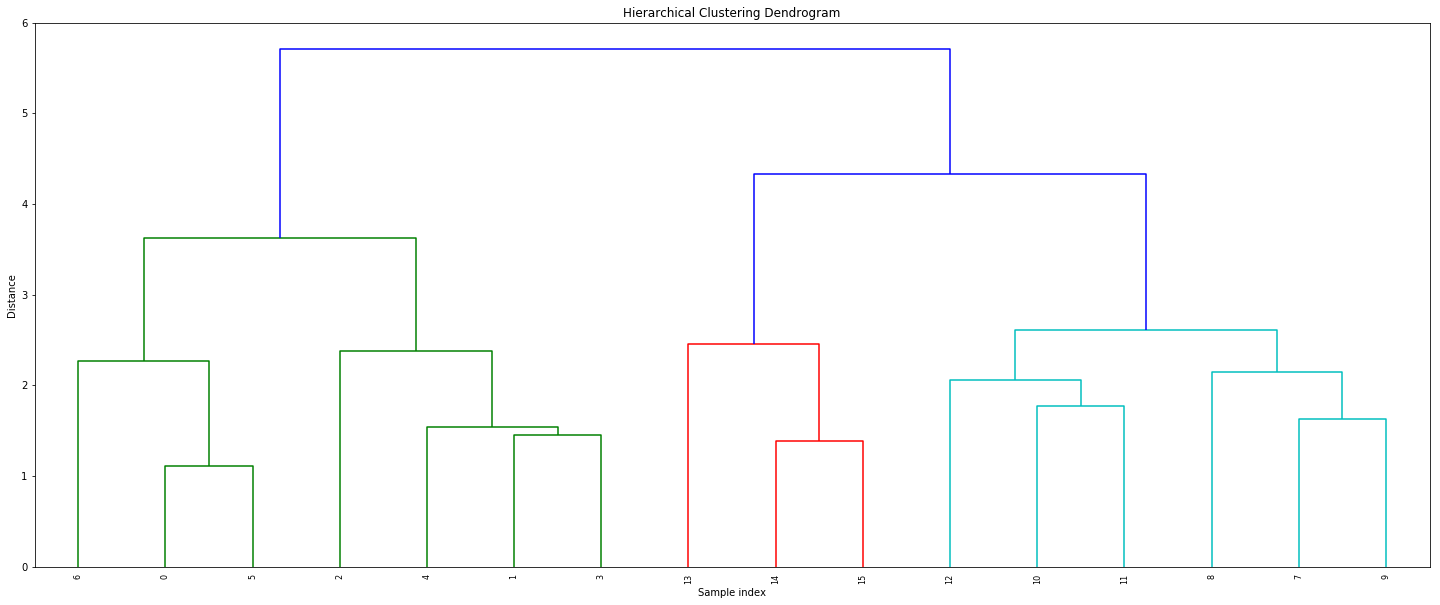

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.show()

По дендрограмме наиболее адекватно выделяются 3 или 4 кластера. 

Проведем кластеризацию на 3 и 4 кластера, визуализируем полученные кластеры и посмотрим на метрику silhouette.

In [16]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
clusters_3 = fcluster(Z, t=3, criterion='maxclust')

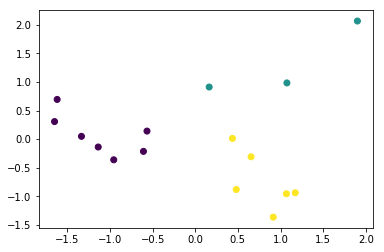

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_3)

Видимо, все-таки данные с пониженной размерностью неплохо отражают структуру кластеров. Полученные кластеры вылядят вполне адекватно.

In [19]:
silhouette_score(X, clusters_3)

0.24970062853995481

In [20]:
silhouette_samples(X, clusters_3)

array([ 0.31079704,  0.16411246,  0.19507294,  0.30406382,  0.1937205 ,
        0.35276831,  0.23080953,  0.09012531,  0.243281  ,  0.21845385,
        0.32312952,  0.3188569 ,  0.24035044,  0.35336656,  0.3020115 ,
        0.15429038])

Визуализируем теперь результат разделения на 4 кластера. 

In [21]:
clusters_4 = fcluster(Z, t=4, criterion='maxclust')

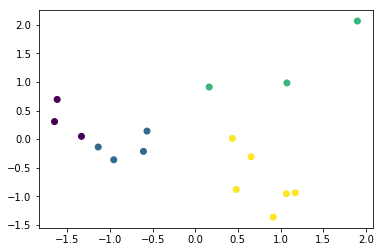

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_4)

In [23]:
silhouette_score(X, clusters_4)

0.2438275881854513

In [24]:
silhouette_samples(X, clusters_4)

array([ 0.27100775,  0.20340333,  0.33646955,  0.30022796,  0.10828755,
        0.26199109,  0.30407581,  0.08457334,  0.23620641,  0.21845385,
        0.32312952,  0.26375818,  0.22658288,  0.35336656,  0.3020115 ,
        0.10769613])

С точки зрения метрики разница незначительна в сторону 3 кластеров. По визуализации хочется кластеризовать на 3 кластера, т.к. кластеры выглядят более однородными и логичными. При отсутствии реальных меток я бы кластеризовала на 3 кластера.

In [25]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, zero_one_loss, classification_report 

def unsupervised_results(predicted_labels_unsupervised, recieved_labels):
    print(homogeneity_score(predicted_labels_unsupervised, recieved_labels))


def accuracy_check(model, x_test, y_test):
#     Load here the model and validation set data to test
    # test accuracy
    y_pred_ts = model.predict(x_test)
    predictions_ts = [round(value) for value in y_pred_ts]
    accuracy2 = accuracy_score(y_test, predictions_ts)
    print("Accuracy on test: %.2f%%" % (accuracy2 * 100.0))
    baccuracy2 = balanced_accuracy_score(y_test, predictions_ts)
    print("Balanced Accuracy on test: %.2f%%" % (baccuracy2 * 100.0))
    z12 = zero_one_loss(y_test, predictions_ts)
    print("Zero One Loss on test: %.2f%%" % (z12 * 100))
    class_rep2 = classification_report(y_test, predictions_ts)
    print(class_rep2)

Проверим метрику для 3 кластеров.

In [26]:
unsupervised_results(target, clusters_3)

0.834988083757


Прилично. Для интереса посмотрим на метрику для 4 кластеров.

In [27]:
unsupervised_results(target, clusters_4)

0.834988083757


Посмотрим на само распределение по кластерам

In [28]:
print(target)
print(clusters_3)
print(clusters_4)

[0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2]
[1 1 1 1 1 1 1 3 3 3 3 3 3 2 2 2]
[1 2 2 2 2 1 1 4 4 4 4 4 4 3 3 3]


По реальным меткам видно, что кластеризация на 3 кластера более правдива. На самом деле только один элемент попал не в свой кластер.

Такое же значение метрики объясняется тем, что в случае кластеризации на 4 кластера у нас просто бьется один из кластеров на 2.

### Классификация

Для начала попробуем посмотреть на размеченный датасет.

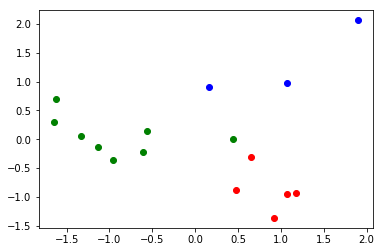

In [40]:
plt.plot(X_pca[target==0, 0], X_pca[target==0, 1], 'go')
plt.plot(X_pca[target==1, 0], X_pca[target==1, 1], 'ro')
plt.plot(X_pca[target==2, 0], X_pca[target==2, 1], 'bo')

Понижение размерности до 2, действительно, неплохо отражает структуру. Довольно четко видно разделение.

In [41]:
from sklearn import model_selection, neighbors

Разобьем данные на тренировочные и валидацию. Т.к. классы несбалансированы, используем стратификацию.

In [42]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, target, shuffle=True, random_state = 42, test_size=0.3, stratify=target)

Исходя из картинки хорошо должен сработать вообще самый простой 1-NN. Данных у нас мало.

In [43]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1)

Оценим качество с помощью кросс-валидации по 2 фолдам, т.к. есть немногочисленные классы.

In [44]:
model_selection.cross_val_score(estimator=model, X=X_train, y=y_train, cv=2).mean()

0.91666666666666674

Неплохо.

In [45]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Посмотрим на предсказания на валидации.

In [46]:
model.predict(X_val)

array([2, 1, 0, 0, 0], dtype=int64)

In [47]:
print(y_val)

[2 1 0 1 0]


In [48]:
accuracy_check(model, X_val, y_val)

Accuracy on test: 80.00%
Balanced Accuracy on test: 83.33%
Zero One Loss on test: 20.00%
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.89      0.83      0.82         5
weighted avg       0.87      0.80      0.79         5

